<a href="https://colab.research.google.com/github/datasciencechampion/Zero-to-Hero-in-NLP-LLM-GenAI-AGI/blob/main/TextDataPreprocessing/Text_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text-data Pre-processing**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- What is text data pre-processing
- Common text preprocessing / cleaning steps:
    - Lower casing
    - Removal of Punctuations
    - Removal of Stopwords
    - Removal of Frequent words
    - Removal of Rare words
    - Stemming
    - Lemmatization
    - Removal of emojis
    - Removal of emoticons
    - Conversion of emoticons to words
    - Conversion of emojis to words
    - Removal of URLs
    - Removal of HTML tags
    - Chat words conversion
    - Spelling correction

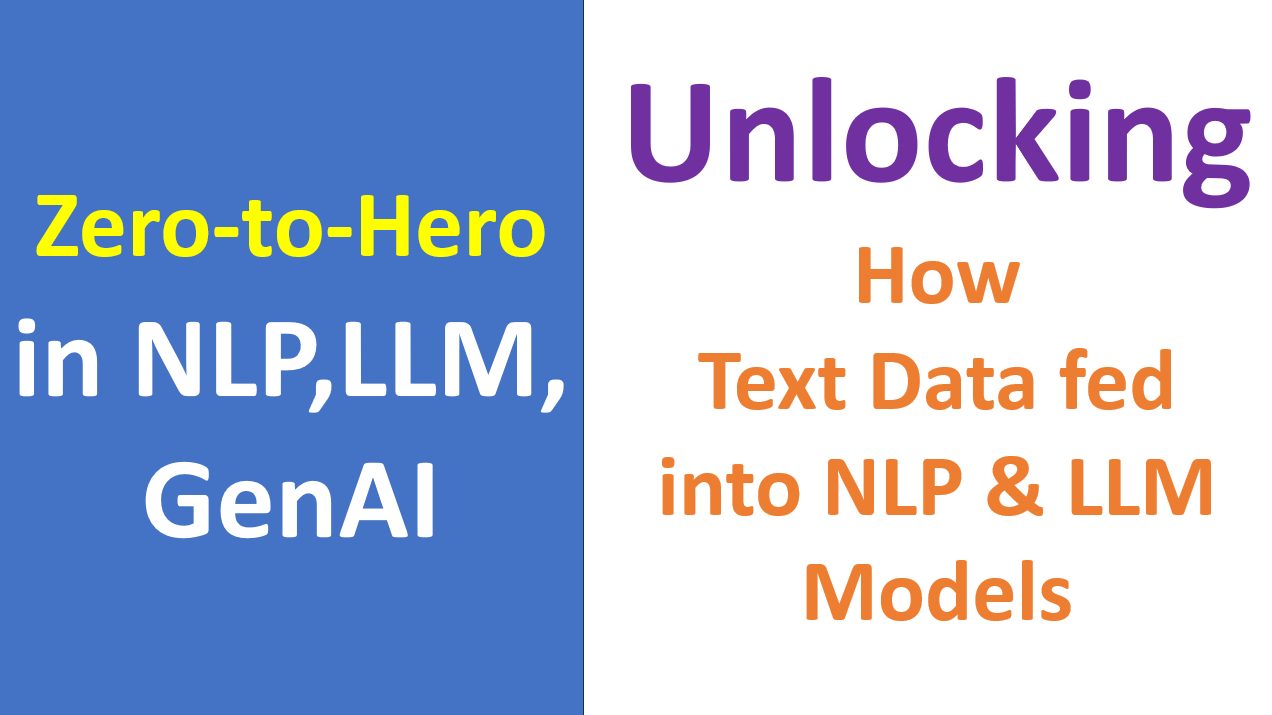

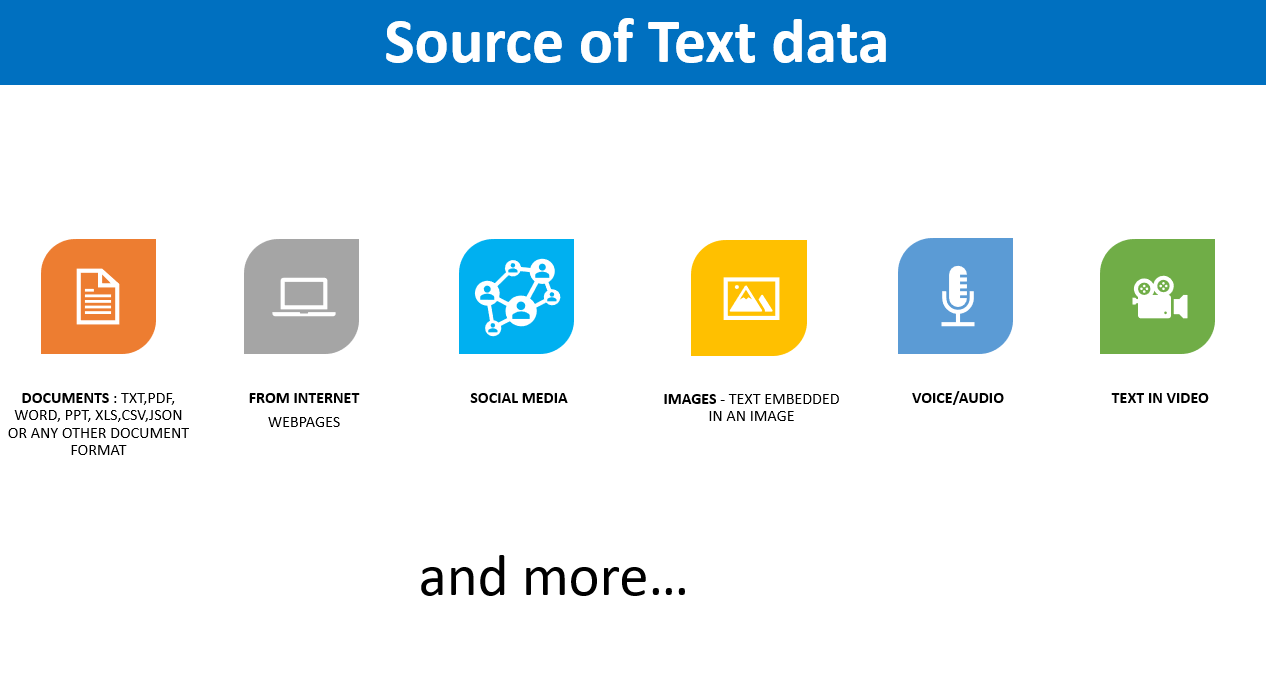

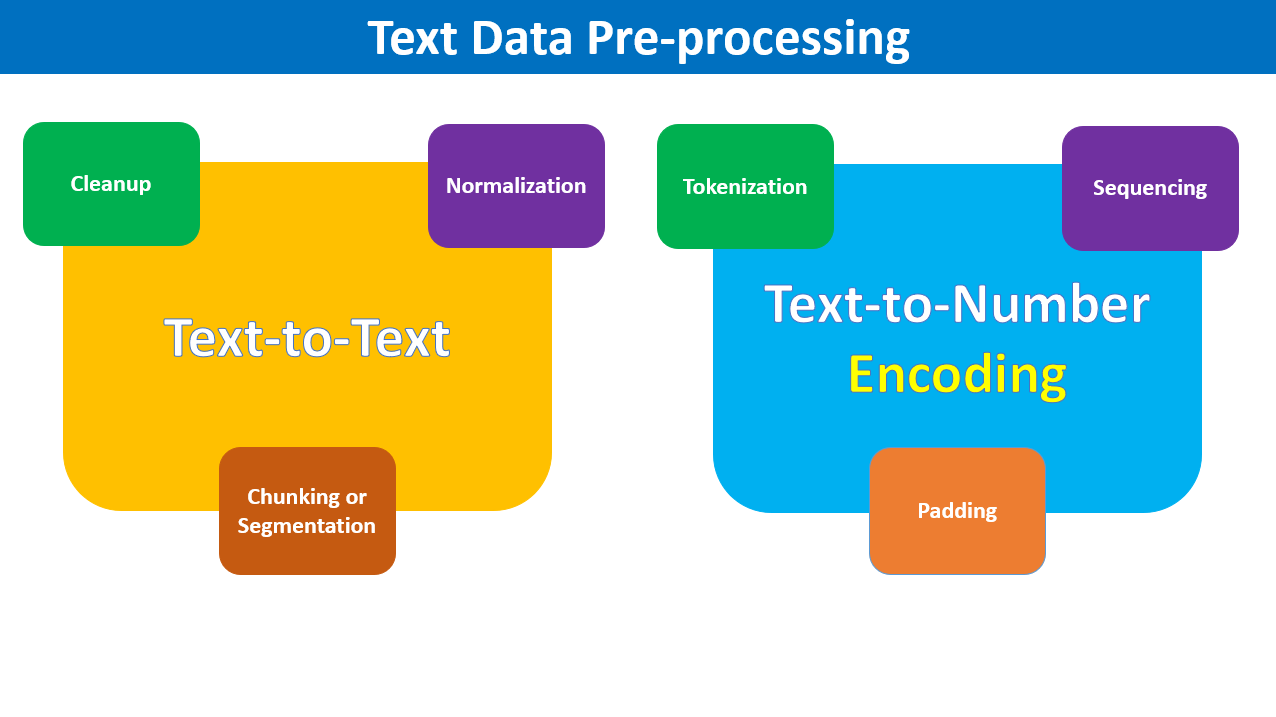

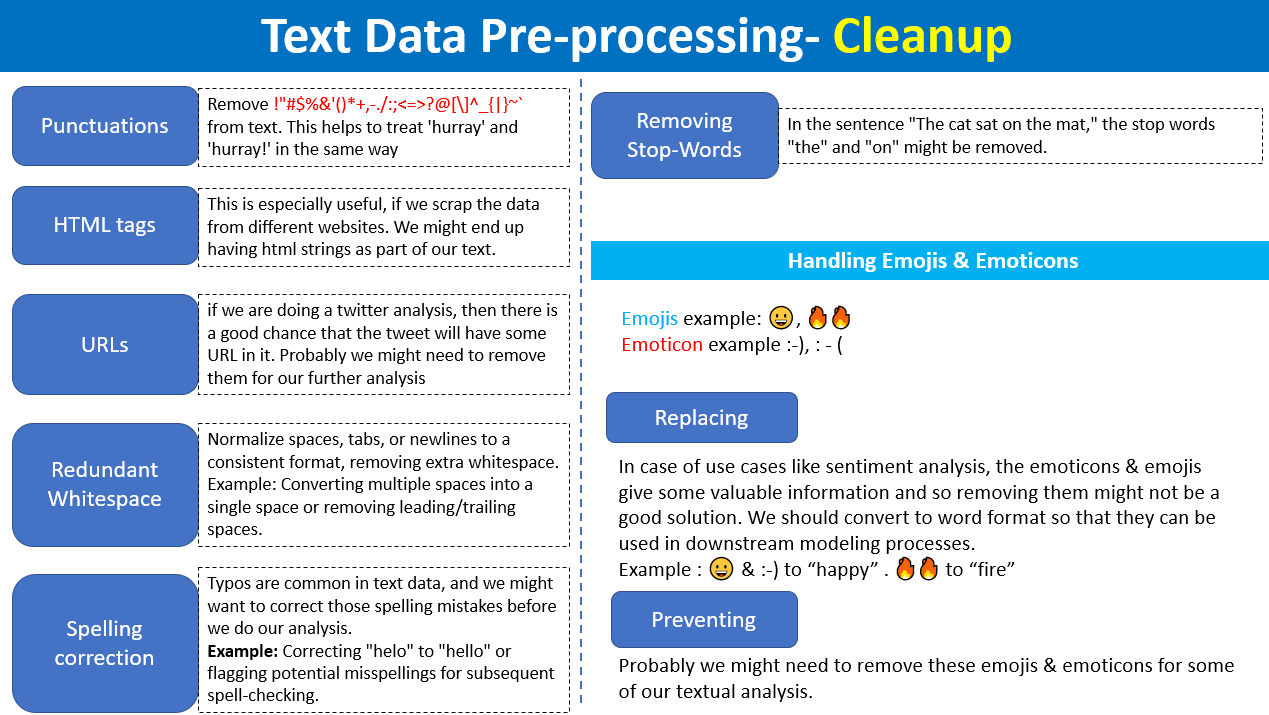

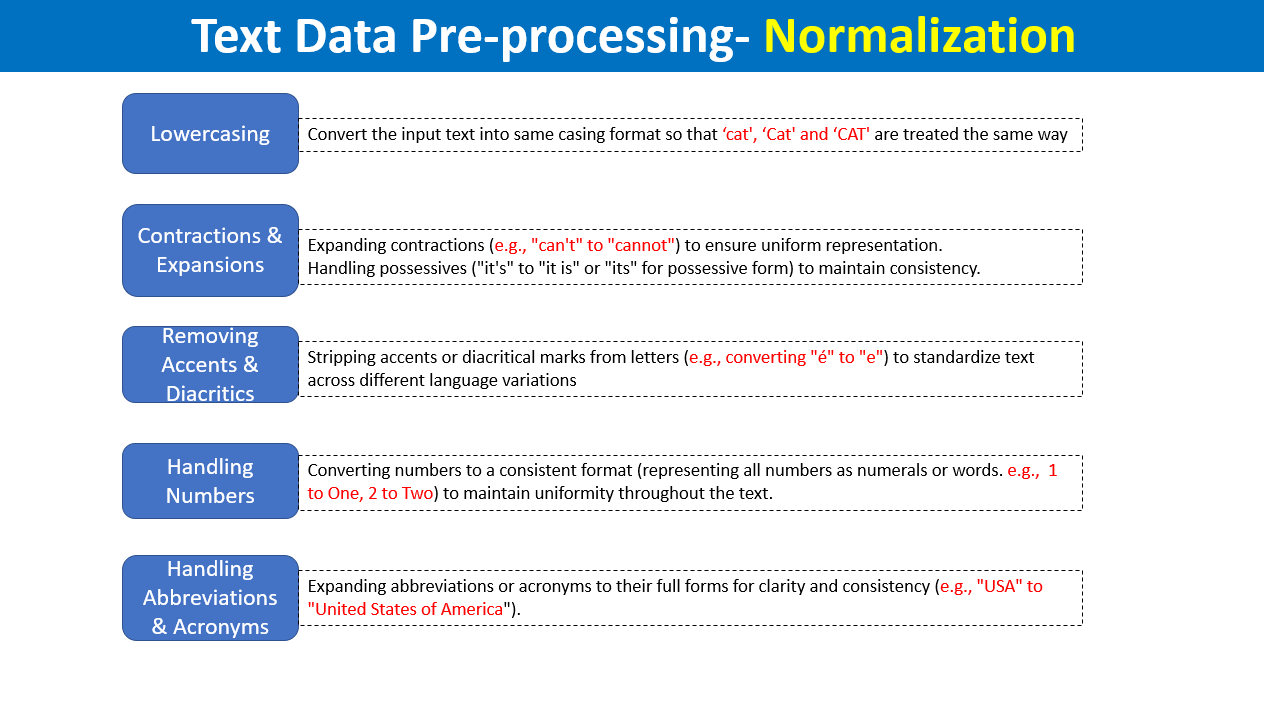

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("/content/gdrive/MyDrive/SampleData/twcs.csv", nrows=5000)
df = full_df[["text"]]
df["text"] = df["text"].astype(str)
full_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


# Lower Casing
Lower casing is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

This is more helpful for text featurization techniques like frequency, tfidf as it helps to combine the same words together thereby reducing the duplication and get correct counts / tfidf values.

This may not be helpful when we do tasks like Part of Speech tagging (where proper casing gives some information about Nouns and so on) and Sentiment Analysis (where upper casing refers to anger and so on)

By default, lower casing is done my most of the modern day vecotirzers and tokenizers like sklearn TfidfVectorizer and Keras Tokenizer. So we need to set them to false as needed depending on our use case.

In [ ]:
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...
4,@sprintcare I did.,@sprintcare i did.


# Removal of Punctuations
One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the string.punctuation in python contains the following punctuation symbols

!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

We can add or remove more punctuations as per our need.

In [ ]:
# drop the new column created in last cell
df.drop(["text_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,text,text_wo_punct
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...
4,@sprintcare I did.,sprintcare I did


# Removal of stopwords
Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,text_wo_punct,text_wo_stop
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...,115712 I understand I would like assist We wou...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...,sprintcare I sent several private messages one...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...,115712 Please send us Private Message assist J...
4,@sprintcare I did.,sprintcare I did,sprintcare I


Similarly we can also get the list for other languages as well and use them.

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,text,text_wo_punct,text_wo_stop
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...,115712 I understand I would like assist We wou...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...,sprintcare I sent several private messages one...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...,115712 Please send us Private Message assist J...
4,@sprintcare I did.,sprintcare I did,sprintcare I


# Removal of Frequent words
In the previos preprocessing step, we removed the stopwords based on language information. But say, if we have a domain specific corpus, we might also have some frequent words which are of not so much importance to us.

So this step is to remove the frequent words in the given corpus. If we use something like tfidf, this is automatically taken care of.

Let us get the most common words and then remove them in the next step

In [ ]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('I', 1437),
 ('us', 752),
 ('DM', 514),
 ('help', 479),
 ('Please', 376),
 ('We', 338),
 ('Hi', 293),
 ('Thanks', 287),
 ('get', 279),
 ('please', 247)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,text,text_wo_punct,text_wo_stop,text_wo_stopfreq
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...,115712 I understand I would like assist We wou...,115712 understand would like assist would need...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...,sprintcare I sent several private messages one...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...,115712 Please send us Private Message assist J...,115712 send Private Message assist Just click ...
4,@sprintcare I did.,sprintcare I did,sprintcare I,sprintcare


# Removal of Rare words
This is very similar to previous preprocessing step but we will remove the rare words from the corpus.

In [ ]:
# Drop the two columns which are no more needed
df.drop(["text_wo_punct", "text_wo_stop"], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df.head()

,text,text_wo_stopfreq,text_wo_stopfreqrare
0,@115712 I understand. I would like to assist y...,115712 understand would like assist would need...,115712 understand would like assist would need...
1,@sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,115712 send Private Message assist Just click ...,115712 send Private Message assist Just click ...
4,@sprintcare I did.,sprintcare,sprintcare


We can combine all the list of words (stopwords, frequent words and rare words) and create a single list to remove them at once.

# Stemming
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form (From Wikipedia)

For example, if there are two words in the corpus walks and walking, then stemming will stem the suffix to make them walk. But say in another example, we have two words console and consoling, the stemmer will remove the suffix and make them consol which is not a proper english word.

There are several type of stemming algorithms available and one of the famous one is porter stemmer which is widely used. We can use nltk package for the same.

In [ ]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns
df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True)

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(lambda text: stem_words(text))
df.head()

,text,text_stemmed
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcar and how do you propos we do that
2,@sprintcare I have sent several private messag...,@sprintcar i have sent sever privat messag and...
3,@115712 Please send us a Private Message so th...,@115712 pleas send us a privat messag so that ...
4,@sprintcare I did.,@sprintcar i did.


We can see that words like private and propose have their e at the end chopped off due to stemming. This is not intented. What can we do fort hat? We can use Lemmatization in such cases.

Also this porter stemmer is for English language. If we are working with other languages, we can use snowball stemmer. The supported languages for snowball stemmer are

In [ ]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

# Lemmatization
Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization.

Let us use the WordNetLemmatizer in nltk to lemmatize our sentences

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

,text,text_stemmed,text_lemmatized
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcar and how do you propos we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcar i have sent sever privat messag and...,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...,@115712 pleas send us a privat messag so that ...,@115712 Please send u a Private Message so tha...
4,@sprintcare I did.,@sprintcar i did.,@sprintcare I did.


We can see that the trailing e in the propose and private is retained when we use lemmatization unlike stemming.

Wait. There is one more thing in lemmatization. Let us try to lemmatize running now.

In [ ]:
lemmatizer.lemmatize("running")

'running'

Wow. It returned running as such without converting it to the root form run. This is because the lemmatization process depends on the POS tag to come up with the correct lemma. Now let us lemmatize again by providing the POS tag for the word.

In [ ]:
lemmatizer.lemmatize("running", "v") # v for verb

'run'

Now we are getting the root form run. So we also need to provide the POS tag of the word along with the word for lemmatizer in nltk. Depending on the POS, the lemmatizer may return different results.

Let us take the example, stripes and check the lemma when it is both verb and noun.

In [ ]:
print("Word is : stripes")
print("Lemma result for verb : ",lemmatizer.lemmatize("stripes", 'v'))
print("Lemma result for noun : ",lemmatizer.lemmatize("stripes", 'n'))

Word is : stripes
Lemma result for verb :  strip
Lemma result for noun :  stripe


Now let us redo the lemmatization process for our dataset.

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

,text,text_stemmed,text_lemmatized
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcar and how do you propos we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcar i have sent sever privat messag and...,@sprintcare I have send several private messag...
3,@115712 Please send us a Private Message so th...,@115712 pleas send us a privat messag so that ...,@115712 Please send u a Private Message so tha...
4,@sprintcare I did.,@sprintcar i did.,@sprintcare I did.


We can now see that in the third row, sent got converted to send since we provided the POS tag for lemmatization.

# Removal of Emojis
With more and more usage of social media platforms, there is an explosion in the usage of emojis in our day to day life as well. Probably we might need to remove these emojis for some of our textual analysis.

Thanks to this code, please find below a helper function to remove emojis from our text.

In [ ]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [ ]:
remove_emoji("Hilarious😂")

# Removal of Emoticons
This is what we did in the last step right? Nope. We did remove emojis in the last step but not emoticons. There is a minor difference between emojis and emoticons.

From Grammarist.com, emoticon is built from keyboard characters that when put together in a certain way represent a facial expression, an emoji is an actual image.

:-) is an emoticon

😀 is an emoji

Thanks to NeelShah for the wonderful collection of emoticons, we are going to use them to remove emoticons.

Please note again that the removal of emojis / emoticons are not always preferred and decision should be made based on the use case at hand.

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

NameError: ignored

In [ ]:
remove_emoticons("I am sad :(")

# Conversion of Emoticon to Words
In the previous step, we have removed the emoticons. In case of use cases like sentiment analysis, the emoticons give some valuable information and so removing them might not be a good solution. What can we do in such cases?

One way is to convert the emoticons to word format so that they can be used in downstream modeling processes. Thanks for Neel again for the wonderful dictionary that we have used in the previous step. We are going to use that again for conversion of emoticons to words.

In [ ]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

text = "Hello :-) :-)"
convert_emoticons(text)

NameError: ignored

In [ ]:
text = "I am sad :()"
convert_emoticons(text)

This method might be better for some use cases when we do not want to miss out on the emoticon information.

# Conversion of Emoji to Words
Now let us do the same for Emojis as well. Neel Shah has put together a list of emojis with the corresponding words as well as part of his Github repo. We are going to make use of this dictionary to convert the emojis to corresponding words.

Again this conversion might be better than emoji removal for certain use cases. Please use the one that is suitable for the use case.

In [ ]:
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text

text = "game is on 🔥"
convert_emojis(text)

In [ ]:
text = "Hilarious 😂"
convert_emojis(text)

# Removal of URLs
Next preprocessing step is to remove any URLs present in the data. For example, if we are doing a twitter analysis, then there is a good chance that the tweet will have some URL in it. Probably we might need to remove them for our further analysis.

We can use the below code snippet to do that.

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

Let us take a https link and check the code

In [ ]:
text = "Driverless AI NLP blog post on https://www.h2o.ai/blog/detecting-sarcasm-is-difficult-but-ai-may-have-an-answer/"
remove_urls(text)

'Driverless AI NLP blog post on '

Thanks to Pranjal for the edge cases in the comments below. Suppose say there is no http or https in the url link. The function can now captures that as well.

In [ ]:
text = "Want to know more. Checkout www.h2o.ai for additional information"
remove_urls(text)

'Want to know more. Checkout  for additional information'

# Removal of HTML Tags
One another common preprocessing technique that will come handy in multiple places is removal of html tags. This is especially useful, if we scrap the data from different websites. We might end up having html strings as part of our text.

First, let us try to remove the HTML tags using regular expressions.

In [ ]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""

print(remove_html(text))


 H2O
 AutoML
 Driverless AI



We can also use BeautifulSoup package to get the text from HTML document in a more elegant way.

In [ ]:
from bs4 import BeautifulSoup

def remove_html(text):
    return BeautifulSoup(text, "lxml").text

text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>
"""

print(remove_html(text))


 H2O
 AutoML
 Driverless AI




# Chat Words Conversion
This is an important text preprocessing step if we are dealing with chat data. People do use a lot of abbreviated words in chat and so it might be helpful to expand those words for our analysis purposes.

Got a good list of chat slang words from this repo. We can use this for our conversion here. We can add more words to this list.

In [ ]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

chat_words_conversion("one minute BRB")

NameError: ignored

In [ ]:
chat_words_conversion("imo this is awesome")

We can add more words to our abbreviation list and use them based on our use case.

# Spelling Correction
One another important text preprocessing step is spelling correction. Typos are common in text data and we might want to correct those spelling mistakes before we do our analysis.

If we are interested in wrinting a spell corrector of our own, we can probably start with famous code from Peter Norvig.

In this notebook, let us use the python package pyspellchecker for our spelling correction.

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

text = "speling correctin"
correct_spellings(text)

ModuleNotFoundError: ignored

In [ ]:
text = "thnks for readin the notebook"
correct_spellings(text)

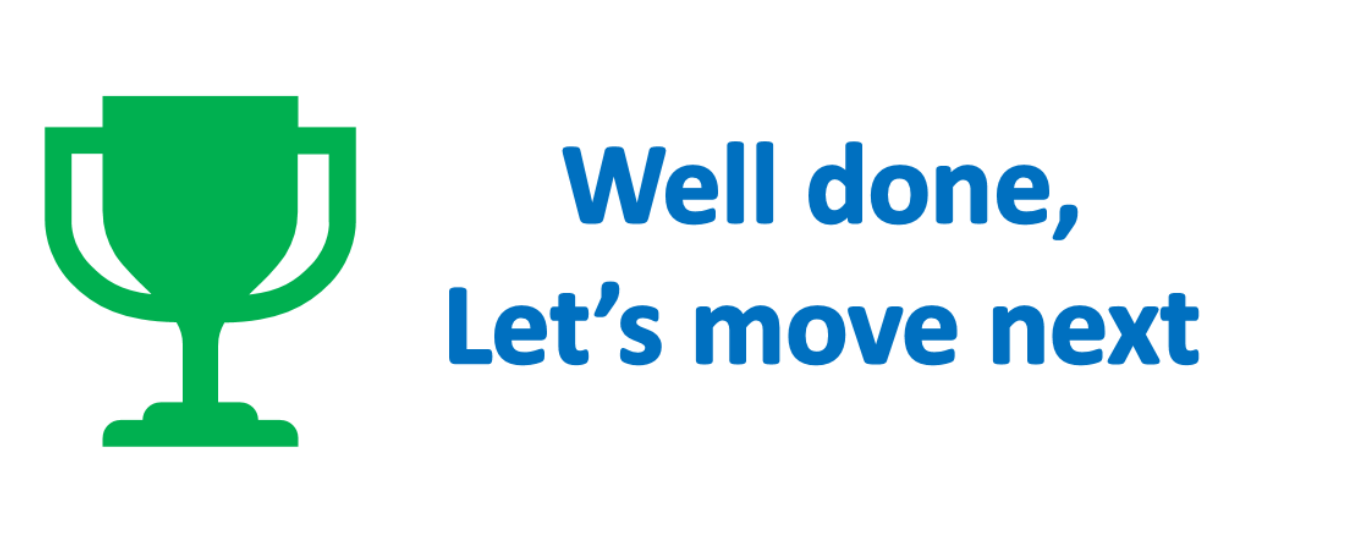